In [15]:
import pandas as pd
import numpy as np
# 顧客代碼
# 購買日期
# 發票金額
df = pd.read_csv("./data.csv",converters={'CustomerID':str})
# 轉成年月
df['date']=df.InvoiceDate.astype(np.str).str.slice(0,8).str.replace('-','')
df['date'] = pd.to_numeric(df['date'], errors='coerce')

In [16]:
# 計算最近購買日期(Recency)
def f(row):
    if row['date'] > 201110:
        val = 5
    elif row['date'] <= 201110 and row['date'] > 201108:
        val = 4
    elif row['date'] <= 201108 and row['date'] > 201106:
        val = 3
    elif row['date'] <= 201106 and row['date'] > 201104:
        val = 2
    else:
        val = 1
    return val
df_recency=df[['CustomerID','date']].drop_duplicates()
df_recency['Recency_Flag'] = df_recency.apply(f, axis=1)
df_recency = df_recency.groupby('CustomerID',as_index=False)['Recency_Flag'].max()


In [17]:
df_recency

,CustomerID,Recency_Flag
0,12346,1
1,12747,5
2,12748,5
3,12749,5
4,12820,5
...,...,...
3945,18280,1
3946,18281,2
3947,18282,5
3948,18283,5


In [18]:
Cust_freq=df[['InvoiceNo','CustomerID']].drop_duplicates()
#Calculating the count of unique purchase for each customer
Cust_freq_count=Cust_freq.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').\
reset_index().sort_values('InvoiceNo', ascending=False, axis=0)

# Dividing in 5 equal parts
unique_invoice=Cust_freq_count[['InvoiceNo']]
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['InvoiceNo'], 5)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()

In [19]:
def f2(row):
    if row['InvoiceNo'] < 1:
        val = 1
    elif row['InvoiceNo'] <= 2:
        val = 2
    elif row['InvoiceNo'] <= 3:
        val = 3
    elif row['InvoiceNo'] <= 6:
        val = 4
    else:
        val = 5
    return val
    
Cust_freq_count['Freq_Flag'] = Cust_freq_count.apply(f2, axis=1)

In [20]:
Cust_freq_count

,CustomerID,InvoiceNo,Freq_Flag
2,12748,210,5
3621,17841,124,5
193,13089,97,5
1276,14606,93,5
1783,15311,91,5
...,...,...,...
717,13829,0,1
1988,15590,0,1
3235,17307,0,1
2712,16579,0,1


In [21]:
#Calculating the Sum of total monetary purchase for each customer
Cust_monetary = df.groupby(['CustomerID'])['Total_Price'].aggregate('sum').\
reset_index().sort_values('Total_Price', ascending=False)
# splitting Total price in 5 parts
unique_price=Cust_monetary[['Total_Price']].drop_duplicates()
unique_price=unique_price[unique_price['Total_Price'] > 0]
unique_price['monetary_Band'] = pd.qcut(unique_price['Total_Price'], 5)
unique_price=unique_price[['monetary_Band']].drop_duplicates()

In [22]:
def f3(row):
    if row['Total_Price'] <= 243:
        val = 1
    elif row['Total_Price'] > 243 and row['Total_Price'] <= 463:
        val = 2
    elif row['Total_Price'] > 463 and row['Total_Price'] <= 892:
        val = 3
    elif row['Total_Price'] > 892 and row['Total_Price'] <= 1932:
        val = 4
    else:
        val = 5
    return val
Cust_monetary['Monetary_Flag'] = Cust_monetary.apply(f3, axis=1)

In [23]:
Cust_monetary

,CustomerID,Total_Price,Monetary_Flag
3811,18102,256438.49,5
3340,17450,187482.17,5
3382,17511,88125.38,5
2788,16684,65892.08,5
625,13694,62653.10,5
...,...,...,...
2166,15823,-840.76,1
3451,17603,-1165.30,1
992,14213,-1192.20,1
1826,15369,-1592.49,1


In [26]:
Cust_All=pd.merge(df_recency,Cust_freq[['CustomerID','Freq_Flag']], on=['CustomerID'],how='left')


KeyError: "['Freq_Flag'] not in index"

In [27]:
import pandas as pd
import numpy as np
import os
import datetime as dt

df = pd.read_csv("./data.csv",converters={'CustomerID':str})
df['InvoiceDate']=df.InvoiceDate.astype(np.str).str.slice(0,10) 
df.InvoiceDate=pd.to_datetime(df.InvoiceDate)

In [28]:
df

,CustomerID,InvoiceNo,InvoiceDate,Total_Price
0,17850,536365.0,2010-12-01,15.30
1,17850,536365.0,2010-12-01,20.34
2,17850,536365.0,2010-12-01,22.00
3,17850,536365.0,2010-12-01,20.34
4,17850,536365.0,2010-12-01,20.34
...,...,...,...,...
361873,15804,581585.0,2011-12-09,23.40
361874,13113,581586.0,2011-12-09,23.60
361875,13113,581586.0,2011-12-09,30.00
361876,13113,581586.0,2011-12-09,214.80


In [29]:
def monthly(x):
    return dt.datetime(x.year, x.month, 1)
df['BillMonth'] = df['InvoiceDate'].apply(monthly)

In [30]:
df

,CustomerID,InvoiceNo,InvoiceDate,Total_Price,BillMonth
0,17850,536365.0,2010-12-01,15.30,2010-12-01
1,17850,536365.0,2010-12-01,20.34,2010-12-01
2,17850,536365.0,2010-12-01,22.00,2010-12-01
3,17850,536365.0,2010-12-01,20.34,2010-12-01
4,17850,536365.0,2010-12-01,20.34,2010-12-01
...,...,...,...,...,...
361873,15804,581585.0,2011-12-09,23.40,2011-12-01
361874,13113,581586.0,2011-12-09,23.60,2011-12-01
361875,13113,581586.0,2011-12-09,30.00,2011-12-01
361876,13113,581586.0,2011-12-09,214.80,2011-12-01


In [31]:
g = df.groupby('CustomerID')['BillMonth']
df['CohortMonth'] = g.transform('min')
df.head()

,CustomerID,InvoiceNo,InvoiceDate,Total_Price,BillMonth,CohortMonth
0,17850,536365.0,2010-12-01,15.30,2010-12-01,2010-12-01
1,17850,536365.0,2010-12-01,20.34,2010-12-01,2010-12-01
2,17850,536365.0,2010-12-01,22.00,2010-12-01,2010-12-01
3,17850,536365.0,2010-12-01,20.34,2010-12-01,2010-12-01
4,17850,536365.0,2010-12-01,20.34,2010-12-01,2010-12-01


In [32]:
def get_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

billYear, billMonth = get_int(df, 'BillMonth')
cohortYear, cohortMonth = get_int(df, 'CohortMonth')
diffYear = billYear - cohortYear
diffMonth = billMonth - cohortMonth
df['Month_Index'] = diffYear * 12 + diffMonth + 1

In [33]:
df

,CustomerID,InvoiceNo,InvoiceDate,Total_Price,BillMonth,CohortMonth,Month_Index
0,17850,536365.0,2010-12-01,15.30,2010-12-01,2010-12-01,1
1,17850,536365.0,2010-12-01,20.34,2010-12-01,2010-12-01,1
2,17850,536365.0,2010-12-01,22.00,2010-12-01,2010-12-01,1
3,17850,536365.0,2010-12-01,20.34,2010-12-01,2010-12-01,1
4,17850,536365.0,2010-12-01,20.34,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...
361873,15804,581585.0,2011-12-09,23.40,2011-12-01,2011-05-01,8
361874,13113,581586.0,2011-12-09,23.60,2011-12-01,2010-12-01,13
361875,13113,581586.0,2011-12-09,30.00,2011-12-01,2010-12-01,13
361876,13113,581586.0,2011-12-09,214.80,2011-12-01,2010-12-01,13


In [34]:
g = df.groupby(['CohortMonth', 'Month_Index'])
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index = 'CohortMonth', columns = 'Month_Index', values = 'CustomerID')
cohortSizes = cohortCounts.iloc[:, 0]
retention = cohortCounts.divide(cohortSizes, axis = 0) * 100
retention.round(2)

Month_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.97,33.41,37.77,35.36,39.61,37.54,34.90,35.13,39.72,36.74,49.25,27.32
2011-01-01,100.0,23.20,27.90,24.59,34.25,29.28,26.24,25.97,31.49,35.08,36.19,14.92,NaN
2011-02-01,100.0,25.07,19.17,28.02,28.32,25.37,25.96,28.32,27.73,31.27,9.73,NaN,NaN
2011-03-01,100.0,19.36,26.23,21.57,23.28,17.16,26.23,23.77,29.17,9.31,NaN,NaN,NaN
2011-04-01,100.0,22.46,22.10,21.74,20.65,23.19,23.19,26.45,8.33,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.02,17.06,17.06,21.43,23.81,26.59,9.92,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,21.26,16.43,24.64,25.60,32.37,9.66,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.35,19.19,23.26,27.91,11.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,26.43,22.86,25.71,13.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


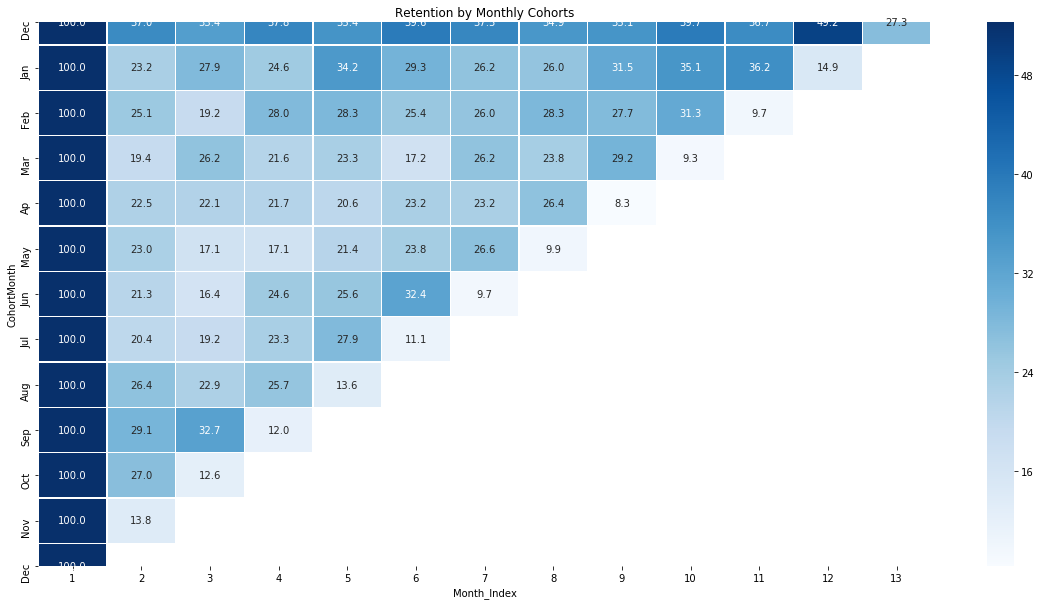

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

month_list = ["Dec", "Jan", "Feb", "Mar", "Ap", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize = (20,10))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(retention.round(2), annot = True, cmap = "Blues", vmax = list(retention.max().sort_values(ascending = False))[1]+3, fmt = '.1f', linewidth = 0.3, yticklabels=month_list)
plt.show()